In [1]:
import ROOT
%run ../src/binning.py
%run ../src/smearing_matrix.py

Welcome to JupyROOT 6.22/06


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-_1r9yzxc because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
#######################################################################
# Declare ROOT files for the Analysis
#######################################################################
mc_files=get_first_N_files("../projects/test/volatile/data/piplus_piminus/",1,"MC_RGA_*")
data_files=get_first_N_files("../projects/test_data/volatile/data/piplus_piminus/",5,"nSidis_RGA_*")

In [3]:
#######################################################################
# 1d Rectangular Binning
#######################################################################

rect_bin_factory = RectBinFactory()
rect_bin_factory.make_bins("rec_z",np.linspace(0.5,0.9,5))
rect_bin_factory.make_bins("rec_phi_h",np.linspace(-3.1415,3.1415,25))

In [4]:
#######################################################################
# Custom Binning
#######################################################################

custom_bin_factory = CustomBinFactory(["rec_z1","rec_z2"])

custom_bin_factory.add_curve("region_1","rec_z1>rec_z2")
custom_bin_factory.add_curve("region_2","rec_z1<rec_z2")

custom_bin_factory.make_bin(["region_1"])
custom_bin_factory.make_bin(["region_2"])

In [5]:
#######################################################################
# Load 1d Rectangular Binning into the BinManager
#######################################################################

bin_manager = BinManager()
bin_manager.load_factory(rect_bin_factory)
#bin_manager.load_factory(custom_bin_factory)

In [6]:
#######################################################################
# Create and run smearing matrix
#######################################################################

smearing_matrix = SmearingMatrix(mc_files, bin_manager)

smearing_matrix.run()

100%|████████████████████████████████████████████| 1/1 [00:11<00:00, 11.09s/it]


In [13]:
#######################################################################
# Perform unfolding
#######################################################################
%run ../src/unfold.py

In [14]:
usable_bins = smearing_matrix.bin_manager.total_bins - 1 # We do not unfold overflow/underflow bins
true_bins = smearing_matrix.true_bins
reco_bins = smearing_matrix.reco_bins
dataloader = DataLoader(bin_manager)
data = dataloader.read_binned_data_from_data_file(data_files)
data_bins = bin_manager.get_bin_ids(*data)

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 27.50it/s]


In [15]:
reco_hist,true_hist,data_hist,unfolded_hist = Unfold.perform_RooUnfold(usable_bins,true_bins,reco_bins,data_bins,"bayes")

LOADING MONTE CARLO VECTORS


100%|███████████████████████████| 3758810/3758810 [00:02<00:00, 1423030.16it/s]


LOADING EXPERIMENTAL DATA VECTORS


100%|███████████████████████████████| 68584/68584 [00:00<00:00, 2163296.17it/s]


PERFORMING UNFOLDING


ReferenceError: attempt to access a null-pointer

3758810
26.1063
An additional truth bin is added to handle 653 fakes.
Now unfolding...
Iteration : 0
Chi^2 of change 77665.6
Iteration : 1
Chi^2 of change 2352.56
Iteration : 2
Chi^2 of change 375.074
Iteration : 3
Chi^2 of change 138.842
Iteration : 4
Chi^2 of change 68.0948
Iteration : 5
Chi^2 of change 38.3355
Iteration : 6
Chi^2 of change 23.4314
Iteration : 7
Chi^2 of change 15.1323
Iteration : 8
Chi^2 of change 10.1678
Iteration : 9
Chi^2 of change 7.04093
Iteration : 10
Chi^2 of change 4.99347
Iteration : 11
Chi^2 of change 3.61125
Iteration : 12
Chi^2 of change 2.65479
Iteration : 13
Chi^2 of change 1.9792
Iteration : 14
Chi^2 of change 1.49362
Iteration : 15
Chi^2 of change 1.13933
Iteration : 16
Chi^2 of change 0.877406
Iteration : 17
Chi^2 of change 0.681501
Iteration : 18
Chi^2 of change 0.533441
Iteration : 19
Chi^2 of change 0.420484
Iteration : 20
Chi^2 of change 0.333568
Iteration : 21
Chi^2 of change 0.266164
Iteration : 22
Chi^2 of change 0.213517
Iteration : 23
Chi^2

Error in <TApplication::ProcessLine>: macro ./unfold.C not found in path .:/opt/root/macros
Error in <TFile::TFile>: file /work/clas12/users/gmat/tmp/unfolded_hists.root does not exist


In [40]:
%run ../src/plot.py

Usage for the plot method:
plot(*args, plot_type='bar', make_title=True)
args: Integers or '<X-AXIS>', '<LABELS>' representing dimensions. Use integers to fix a dimension to a specific bin.
plot_type: 'bar' or 'line'. Default is 'bar'.
make_title: Boolean. If True, a title will be generated from the fixed indices. Default is True.
log_scale: Boolean. If True, the y-axis will be set to a logarithmic scale. Default is False.

Dimensions and their labels:
Dimension 0: rec_z
Dimension 1: rec_phi_h

Number of bins in each dimension:
Dimension 0: 4 bins
Dimension 1: 24 bins


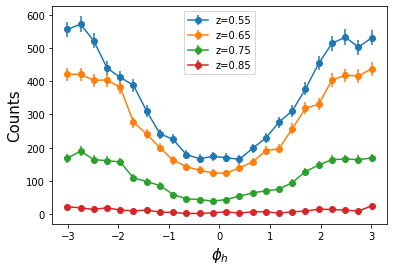

In [41]:
reco_multihist = MultidimensionalHist(bin_manager,reco_hist)
reco_multihist.print_usage()
reco_multihist.plot("<LABELS>","<X-AXIS>",plot_type="line")

Usage for the plot method:
plot(*args, plot_type='bar', make_title=True)
args: Integers or '<X-AXIS>', '<LABELS>' representing dimensions. Use integers to fix a dimension to a specific bin.
plot_type: 'bar' or 'line'. Default is 'bar'.
make_title: Boolean. If True, a title will be generated from the fixed indices. Default is True.
log_scale: Boolean. If True, the y-axis will be set to a logarithmic scale. Default is False.

Dimensions and their labels:
Dimension 0: rec_z
Dimension 1: rec_phi_h

Number of bins in each dimension:
Dimension 0: 4 bins
Dimension 1: 24 bins


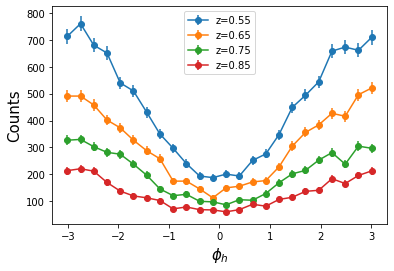

In [42]:
unfolded_multihist = MultidimensionalHist(bin_manager,data_hist)
unfolded_multihist.print_usage()
unfolded_multihist.plot("<LABELS>","<X-AXIS>",plot_type="line")